In [19]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda,Compose
import matplotlib.pyplot as plt
from d2l import torch as d2l

In [2]:
trainning_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

12.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

19.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

34.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

48.3%IOPub

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.6%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



69.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

119.3%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [22]:
batch_size=64
train_dataloader=DataLoader(trainning_data,batch_size=batch_size,num_workers=8,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=batch_size,num_workers=8)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [5]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device}")

Using cuda


In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self) -> None:
        super(NeuralNetwork,self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

model=NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [12]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3,momentum=0.5)

In [13]:
def train(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset)
    model.train()
    for batch,(X,y) in enumerate(dataloader):
        X,y=X.to(device),y.to(device)
        
        pred=model(X)
        loss=loss_fn(pred,y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch%100==0:
            loss,current=loss.item(),batch*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [16]:
def test(dataloader,model,loss_fn):
    size = len(dataloader.dataset)
    num_batches=len(dataloader)
    model.eval()
    test_loss,correct=0,0
    with torch.no_grad():
        for X,y in dataloader:
            X,y=X.to(device),y.to(device)
            pred=model(X)
            test_loss+=loss_fn(pred,y).item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss/=num_batches
    correct/=size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

loss 0.322, train acc 0.885, test acc 0.863
76969.7 examples/sec on cuda


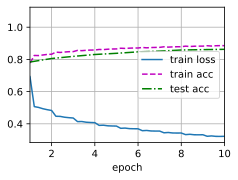

In [20]:
epochs=10
lr=0.02
d2l.train_ch6(model, train_dataloader, test_dataloader, epochs, lr, device)

In [21]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.255838  [    0/60000]
loss: 0.329990  [ 6400/60000]
loss: 0.177367  [12800/60000]
loss: 0.292878  [19200/60000]
loss: 0.275857  [25600/60000]
loss: 0.319831  [32000/60000]
loss: 0.324293  [38400/60000]
loss: 0.398838  [44800/60000]
loss: 0.399183  [51200/60000]
loss: 0.317595  [57600/60000]
Test Error: 
 Accuracy: 87.3%, Avg loss: 0.356584 

Epoch 2
-------------------------------
loss: 0.221928  [    0/60000]
loss: 0.329249  [ 6400/60000]
loss: 0.171185  [12800/60000]
loss: 0.291447  [19200/60000]
loss: 0.276475  [25600/60000]
loss: 0.316404  [32000/60000]
loss: 0.320180  [38400/60000]
loss: 0.399842  [44800/60000]
loss: 0.399520  [51200/60000]
loss: 0.317355  [57600/60000]
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.355602 

Epoch 3
-------------------------------
loss: 0.220525  [    0/60000]
loss: 0.327567  [ 6400/60000]
loss: 0.169980  [12800/60000]
loss: 0.290913  [19200/60000]
loss: 0.276213  [25600/60000]
loss: 0.314667  [32000/600